# Tests on GPy and Gaussian Process codes

Manually written algorithm to sample from a Gaussian process:

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import GPy
import plotly 
plotly.tools.set_credentials_file(username='jsmarti', api_key='gwa649yekj')
%matplotlib inline

[  0.           1.11111111   2.22222222   3.33333333   4.44444444
   5.55555556   6.66666667   7.77777778   8.88888889  10.        ]
[[  0.        ]
 [  1.11111111]
 [  2.22222222]
 [  3.33333333]
 [  4.44444444]
 [  5.55555556]
 [  6.66666667]
 [  7.77777778]
 [  8.88888889]
 [ 10.        ]]


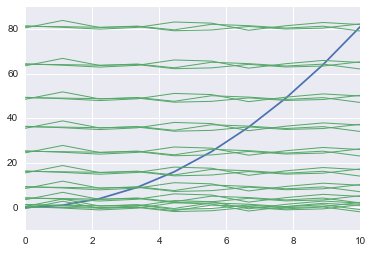

In [4]:
n = 10  #Number of inputs
dim = 1 #dimensions

#Random set of n inputs
x = np.linspace(0, 10, n)
x = x[:,None]

#Parameters of RBF kernel
lengthscale = .1
variance= 1.

#Covariance function
k = GPy.kern.RBF(dim, lengthscale = lengthscale, variance = variance)

#Covariance matrix
K = k.K(x)

#Mean function as zero for all inputs
mean = lambda(x): np.array([i**2 for i in range(x.shape[0])])
m = mean(x)

#Cholesky decomposition, using some stability parameters
nugget = 1e-6
C = K + nugget*np.eye(x.shape[0])
L = np.linalg.cholesky(C)

#For 4 samples:
n_samples = 3
fig, ax = plt.subplots()
ax.plot(x,m)
for i in xrange(n_samples):
    z = np.random.randn(x.shape[0],1) #Standard normal
    f = m + np.dot(L,z)
    ax.plot(x, f, color=sns.color_palette()[1], linewidth=1)

## Gaussian Process Regression
Tutorial on Gaussian process regressions from the GPy notebook

### 1-dimensional model
Considering the following inputs and outputs:

In [6]:
X = np.random.uniform(-3.,3.,(20,1))
Y = np.sin(X) + np.random.randn(20,1)*0.05

Variable $X$ is generated from a uniform distribution and $Y$ contains noise sampled from a standard normal distribution.

Now, we choose the RBF covariance kernel for the model:

In [7]:
k = GPy.kern.RBF(input_dim=1, variance=1., lengthscale = 1.)

The function used receives 3 parameters, the input dimension ($dim(X)$), the variance and the lengthscale.

The mean function is apparently set by default. Still, it doesn't matter. Now, we build the regression with the inputs and the kernel function

In [8]:
model = GPy.models.GPRegression(X,Y,k)

Lets analyze the model we have built

In [9]:
from IPython.display import display
display(model)

GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


In [11]:
fig = model.plot()
GPy.plotting.change_plotting_library('plotly')
GPy.plotting.show(fig, filename='basic_gp_regression_notebook')

This is the format of your plot grid:
[ (1,1) x1,y1 ]

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~jsmarti/0 or inside your plot.ly account where it is named 'basic_gp_regression_notebook'
